<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sprint_Challenge/Kumar_Veeravel_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [0]:
cell_phones.cell_phones_total.value_counts(ascending=True)

In [11]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [4]:
#Lets check shape on all three
print(cell_phones.shape)
print(population.shape)
print(geo_country_codes.shape)

(9215, 3)
(59297, 3)
(273, 2)


Check for missing/null values in the three dataframes

In [3]:
print(cell_phones.isnull().sum(),'\n')
print(population.isnull().sum(),'\n')
print(geo_country_codes.isnull().sum(),'\n')
#No null values in any of the dataframes

geo                  0
time                 0
cell_phones_total    0
dtype: int64 

geo                 0
time                0
population_total    0
dtype: int64 

geo        0
country    0
dtype: int64 



Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phone_total"

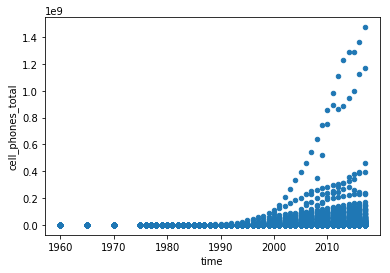

In [176]:
cell_phones.plot('time','cell_phones_total',kind='scatter')

Bonus (This requires the merged data frame from the next section, so rerun
The cells after merged2 is in memory)

In [184]:
print(merged2.country.value_counts().loc['China'])
merged2.country.value_counts().loc['United States']

46


43

In [207]:
condition = (merged2.country == 'United States') | (merged2.country == 'China')
us_china_subset = merged2[condition]
us_china_subset.tail()

,geo,time,cell_phones_total,population_total,country,phones_per_person
8130,USA,2013,310698000.0,315536676,United States,0.984665
8131,USA,2014,355500000.0,317718779,United States,1.118914
8132,USA,2015,382307000.0,319929162,United States,1.194974
8133,USA,2016,395881000.0,322179605,United States,1.228759
8134,USA,2017,395881000.0,324459463,United States,1.220125


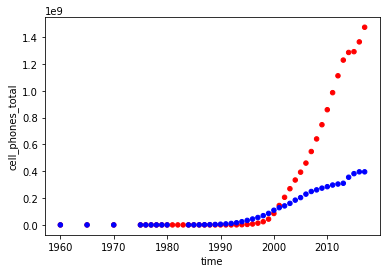

In [193]:
import numpy as np
#This condition should make the dots red for china and blue for us
col_cond = np.where(us_china_subset.country=="China",'r','b')
us_china_subset.plot('time','cell_phones_total',kind='scatter',c=col_cond)

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [20]:
#I used merge instead of .join... I hope that is okay?
merged = cell_phones.merge(population,how='inner',on=['geo','time'])
print(merged.shape)
merged.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


### Inner Join Explination
The reason an inner join is used here is because we only want observations where we have data for both population, and cell_phone totals. The inner join only adds observations to the generated table if values exist for all non-key* variables in the data frames.


**(*)**  key meaning the "on" ... so in this case on is  "geo" and "time", and "non-key" would be ```cell_phones_total``` in the cell_phones df and ```population_total``` in the population df)


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [28]:
# Your Work Here
merged2 = merged.merge(geo_country_codes,how='inner',on='geo')
print(merged2.shape)
merged2.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [38]:
merged2['phones_per_person']=(merged2.cell_phones_total/merged2.population_total)
print(merged2.head())

   geo  time  ...  phone_per_person  phones_per_person
0  afg  1960  ...               0.0                0.0
1  afg  1965  ...               0.0                0.0
2  afg  1970  ...               0.0                0.0
3  afg  1975  ...               0.0                0.0
4  afg  1976  ...               0.0                0.0

[5 rows x 7 columns]


In [0]:
#Uncomment and run if you run the top cell too many times
#merged2 = merged2.drop('phones_per_person',axis=1)
#merged2.head()

In [198]:
#Changing the lowercase geo code to uppercase:
merged2.geo=merged2.geo.str.upper()
merged2.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [199]:
merged2.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population_total       int64
country               object
phones_per_person    float64
dtype: object

In [200]:
merged2.describe()

,time,cell_phones_total,population_total,phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [201]:
merged2.describe(include = [object])

,geo,country
count,8590,8590
unique,195,195
top,MUS,Comoros
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [208]:
# Not exactly sure what "list of countries should have these totals" means.
# if it implies that I should have done this differently then 
temp = merged2[(merged2['time']==2017)]
temp[['cell_phones_total','country']].sort_values('cell_phones_total',ascending=False).head()

,cell_phones_total,country
1496,1.474097e+09,China
3595,1.168902e+09,India
3549,4.589232e+08,Indonesia
8134,3.958810e+08,United States
1084,2.364885e+08,Brazil


In [214]:
#What was the first year that the US had more cell phones than people

#First Split off US from the main df
us_subset = merged2[merged2.country=='United States']
us_subset.head()

,geo,time,cell_phones_total,population_total,country,phones_per_person
8092,USA,1960,0.0,186808228,United States,0.0
8093,USA,1965,0.0,199815540,United States,0.0
8094,USA,1970,0.0,209588150,United States,0.0
8095,USA,1975,0.0,219205296,United States,0.0
8096,USA,1976,0.0,221239215,United States,0.0


In [225]:
#This df should list all years when there were more phones than people
#If this were bigger / unsorted you could .sort_values('time'),
#and look at the first entry to figure out the answer
us_subset.loc[us_subset.phones_per_person >= 1]


,geo,time,cell_phones_total,population_total,country,phones_per_person
8131,USA,2014,355500000.0,317718779,United States,1.118914
8132,USA,2015,382307000.0,319929162,United States,1.194974
8133,USA,2016,395881000.0,322179605,United States,1.228759
8134,USA,2017,395881000.0,324459463,United States,1.220125


2014 was the first year that there were more phones than people in the US


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [204]:
tab_data = pd.crosstab(index=df['Occupation'],columns=df['Year'],normalize='columns')
tab_data

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Occupation,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.903614,0.739645,0.726115,0.622642,0.560241,0.384146,0.370370,0.360248,0.255319,0.207317,0.208589,0.351515,0.337423,0.268293,0.427711,0.392638,0.45
Government and Politics,0.012048,0.082840,0.038217,0.069182,0.102410,0.225610,0.160494,0.192547,0.170213,0.201220,0.208589,0.181818,0.165644,0.201220,0.126506,0.128834,0.17
Media,0.066265,0.124260,0.197452,0.264151,0.246988,0.274390,0.333333,0.291925,0.333333,0.469512,0.361963,0.303030,0.312883,0.317073,0.307229,0.325153,0.24
Other,0.018072,0.053254,0.038217,0.044025,0.090361,0.115854,0.135802,0.155280,0.241135,0.121951,0.220859,0.163636,0.184049,0.213415,0.138554,0.153374,0.14


### Part 2 — Recreate this explanatory visualization:



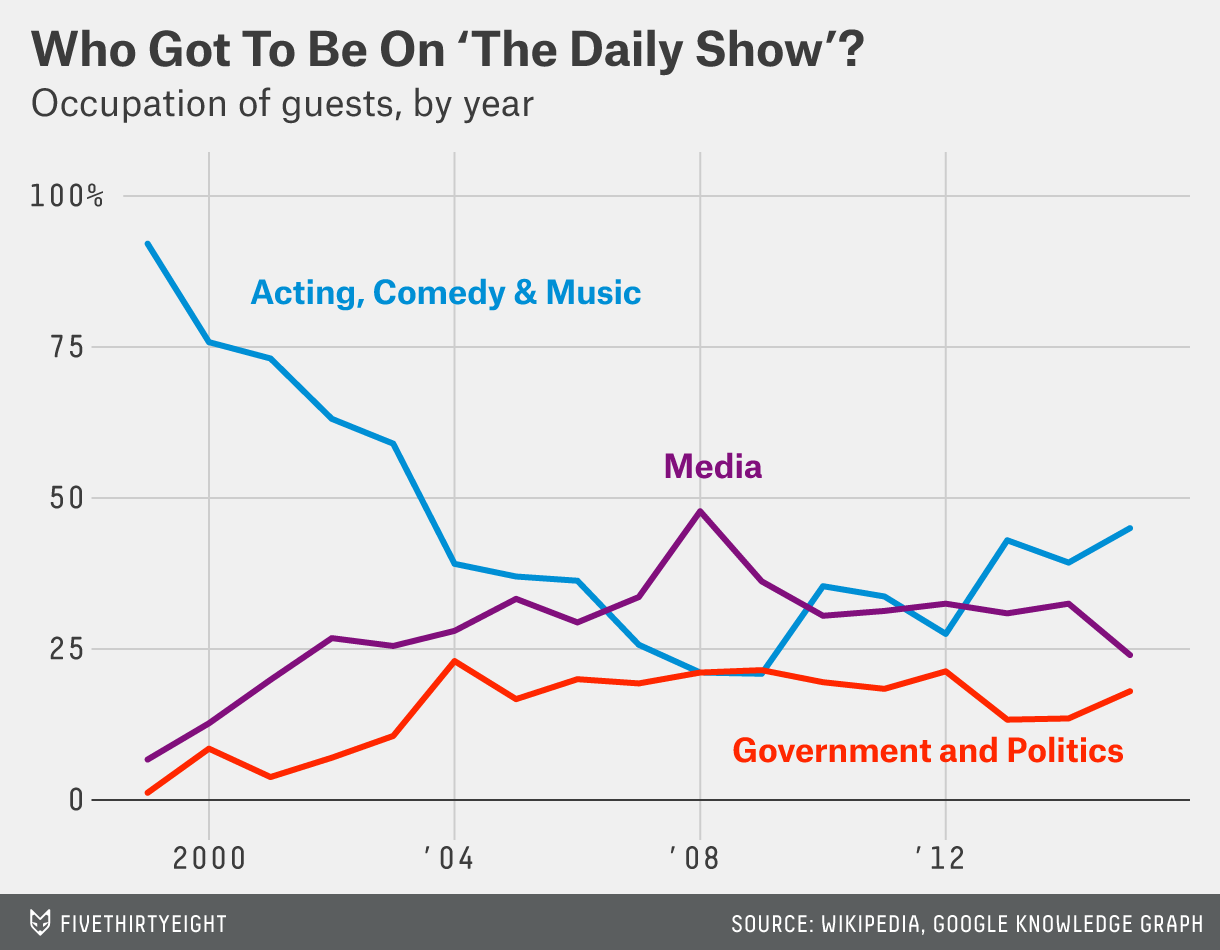

In [205]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
#Lets get the data we need for the graph
#There is a scalable elegant way to do this, but I'm not doing it now
acting = tab_data.loc['Acting, Comedy & Music']
media = tab_data.loc['Media']
gov = tab_data.loc['Government and Politics']

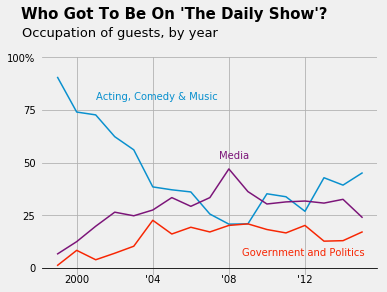

In [230]:
import matplotlib.pyplot as plt

#Semi-parametrizing:
#Ticks
x_tick_str=[2000,2004,2008,2012]
y_tick_str=[0,0.25,0.50,0.75,1]
x_tick_lbl_str=['2000',"'04","'08","'12"]
y_tick_lbl_str=['0','25','50','75','100%']

#Colors:
acting_color="#0990CE"
media_color="#7C1579"
gov_color="#F72603"
background_color = "#F0F0F0"

#Create the object
fig, ax = plt.subplots()

#Set Facecolor to a gray
ax.set_facecolor(background_color)

#Set the figure color to gray
fig.set_facecolor(background_color)

#turn on grid
ax.grid()

#Plot Data:
ax.plot(acting.index,acting,color=acting_color)
ax.plot(media.index,media,color=media_color)
ax.plot(gov.index,gov,color=gov_color)

#Add title:
ax.set_title("Who Got To Be On 'The Daily Show'?",
             x=0.395,
             y=1.15,
             weight='bold',
             size=15)
# Add Subtitle:
ax.text(1997.1,1.1,s="Occupation of guests, by year",size = 13)

#Add Colored Text Labels:
#Acting
ax.text(2001,0.80,"Acting, Comedy & Music",color=acting_color)
#Media
ax.text(2007.5,0.52,"Media",color=media_color)
#Gov
ax.text(2008.7,0.06,"Government and Politics",color=gov_color)

#Set the x and y tick labels
ax.set_xticks(x_tick_str)
ax.set_xticklabels(x_tick_lbl_str)
ax.set_yticks(y_tick_str)
ax.set_yticklabels(y_tick_lbl_str)

#make the ticks invisible
ax.tick_params(width=0)


#Get rid of left right and top spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Set the bottom spine in line with the x axis
ax.spines['bottom'].set_position('zero')

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.
